# Contrucción del modelo de datos
Se hará el siguiente modelo de entidad relación

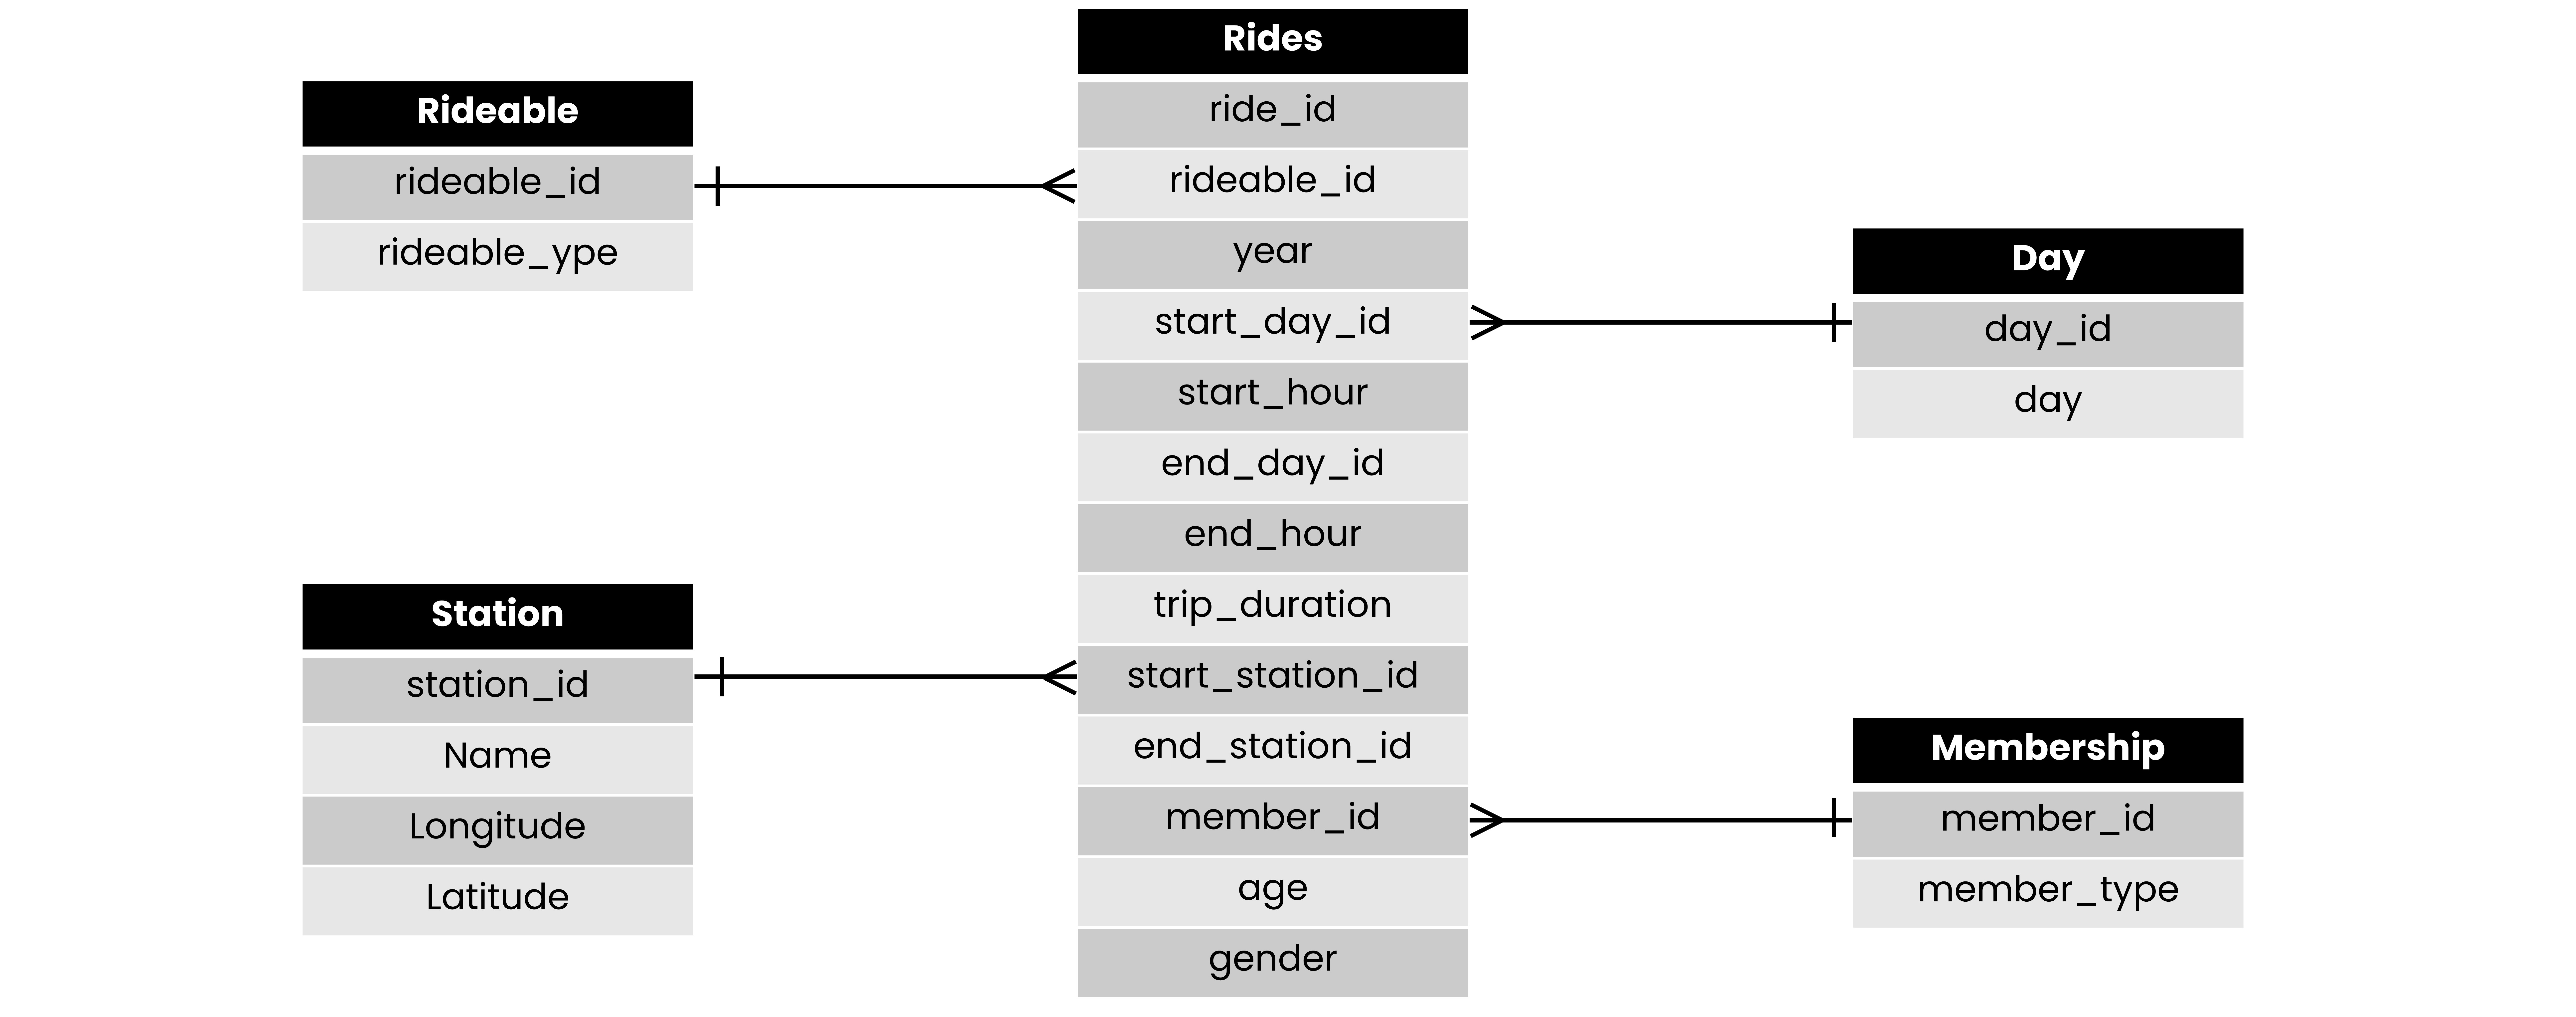

In [1]:
import pandas as pd

In [2]:
registros = pd.read_csv('total_registros.csv')

C:\Users\deemi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Tabla *Rides*

In [3]:
rides = registros[['ride_id', 'rideable_id', 'year', 'start_day_id', 'start_hour', 'end_day_id', 'end_hour',
                   'trip_duration', 'start_station_id', 'end_station_id', 'member_id', 'age', 'gender']]
rides

,ride_id,rideable_id,year,start_day_id,start_hour,end_day_id,end_hour,trip_duration,start_station_id,end_station_id,member_id,age,gender
0,1.0,NaN,2020,6.0,0,6.0,0,14.03,1,10.0,1.0,40.0,male
1,2.0,NaN,2020,6.0,0,6.0,0,3.43,2,13.0,1.0,30.0,male
2,3.0,NaN,2020,6.0,0,6.0,0,14.32,3,12.0,2.0,29.0,male
3,4.0,NaN,2020,6.0,0,6.0,0,11.57,3,4.0,1.0,33.0,male
4,5.0,NaN,2020,6.0,0,6.0,0,24.57,5,13.0,2.0,51.0,unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59749,59750.0,1.0,2022,7.0,12,7.0,12,11.33,8,12.0,1.0,NaN,NaN
59750,59751.0,1.0,2022,4.0,20,4.0,20,6.98,25,12.0,1.0,NaN,NaN
59751,59752.0,1.0,2022,3.0,19,3.0,19,12.63,25,12.0,1.0,NaN,NaN
59752,59753.0,1.0,2022,3.0,18,3.0,18,4.05,25,9.0,1.0,NaN,NaN


In [4]:
rides.to_csv('bdd//rides.csv', index = False)

### Tabla *Rideable*

In [5]:
rideable = pd.DataFrame({'redeable_id':[1,2], 'redeable_type':['classic', 'docked']})
rideable

,redeable_id,redeable_type
0,1,classic
1,2,docked


In [6]:
rideable.to_csv('bdd//rideable.csv', index = False)

### Tabla *Day*

In [7]:
day = pd.DataFrame({'day_id':[1,2,3,4,5,6,7], 
                    'day':['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']})
day

,day_id,day
0,1,monday
1,2,tuesday
2,3,wednesday
3,4,thursday
4,5,friday
5,6,saturday
6,7,sunday


In [8]:
day.to_csv('bdd//day.csv', index = False)

### Tabla *Station*

In [9]:
nombres_aux = list()
lista_id = list()
lista_nombre = list()
lista_x = list()
lista_y = list()

i = 0
for ind in registros.index:
    
    nombre_ini = registros['start_station_name'].loc[ind]
    nombre_fin = registros['end_station_name'].loc[ind]
    
    if str(nombre_fin) == 'nan':
        continue
    
    if nombre_ini not in nombres_aux:
        x_start = registros['start_lng'].loc[ind]
        y_start = registros['start_lat'].loc[ind]
        nombres_aux.append(nombre_ini)
        
        i = i + 1
        lista_id.append(i)
        lista_nombre.append(nombre_ini)
        lista_x.append(round(x_start,3))
        lista_y.append(round(y_start,3))
        
    elif nombre_fin not in nombres_aux:
        x_end = registros['end_lng'].loc[ind]
        y_end = registros['end_lat'].loc[ind]
        if str(x_end) == 'nan' or str(y_end) == 'nan':
            continue
        else:
            nombres_aux.append(nombre_fin)
            
            i = i + 1
            lista_id.append(i)
            lista_nombre.append(nombre_fin)
            lista_x.append(round(x_end,3))
            lista_y.append(round(y_end,3))
            
station = pd.DataFrame({'station_id':lista_id, 'name':lista_nombre, 'longitude':lista_x, 'latitude':lista_y})
station

,station_id,name,longitude,latitude
0,1,Newport Pkwy,-74.032,40.729
1,2,Manila & 1st,-74.043,40.722
2,3,City Hall,-74.044,40.718
3,4,Communipaw & Berry Lane,-74.067,40.714
4,5,Liberty Light Rail,-74.056,40.711
...,...,...,...,...
106,107,E 5 St & Cooper Sq,-73.991,40.728
107,108,North Moore St & Greenwich St,-74.010,40.720
108,109,Broadway & W 155 St,-73.946,40.833
109,110,Murray St & Greenwich St,-74.011,40.715


In [10]:
station.to_csv('bdd//station.csv', index = False)

### Tabla *Membership*

In [11]:
membership = pd.DataFrame({'member_id':[1,2], 'member_type':['annual', 'casual']})
membership

,member_id,member_type
0,1,annual
1,2,casual


In [12]:
membership.to_csv('bdd//membership.csv', index = False)